<a href="https://colab.research.google.com/github/CyDevLabs/Underwater-Mine-Warfare-/blob/main/DAE_code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
1/1 [==============================] - 1s 849ms/step - loss: 116.5477
Epoch 2/50
1/1 [==============================] - 0s 346ms/step - loss: -302.8514
Epoch 3/50
1/1 [==============================] - 0s 349ms/step - loss: -319.0885
Epoch 4/50
1/1 [==============================] - 0s 354ms/step - loss: -324.8242
Epoch 5/50
1/1 [==============================] - 0s 350ms/step - loss: -327.0436
Epoch 6/50
1/1 [==============================] - 0s 365ms/step - loss: -336.9237
Epoch 7/50
1/1 [==============================] - 0s 363ms/step - loss: -340.4645
Epoch 8/50
1/1 [==============================] - 0s 339ms/step - loss: -341.1055
Epoch 9/50
1/1 [==============================] - 0s 346ms/step - loss: -342.8837
Epoch 10/50
1/1 [==============================] - 0s 355ms/step - loss: -349.1881
Epoch 11/50
1/1 [==============================] - 

1/1 [==============================] - 0s 104ms/step


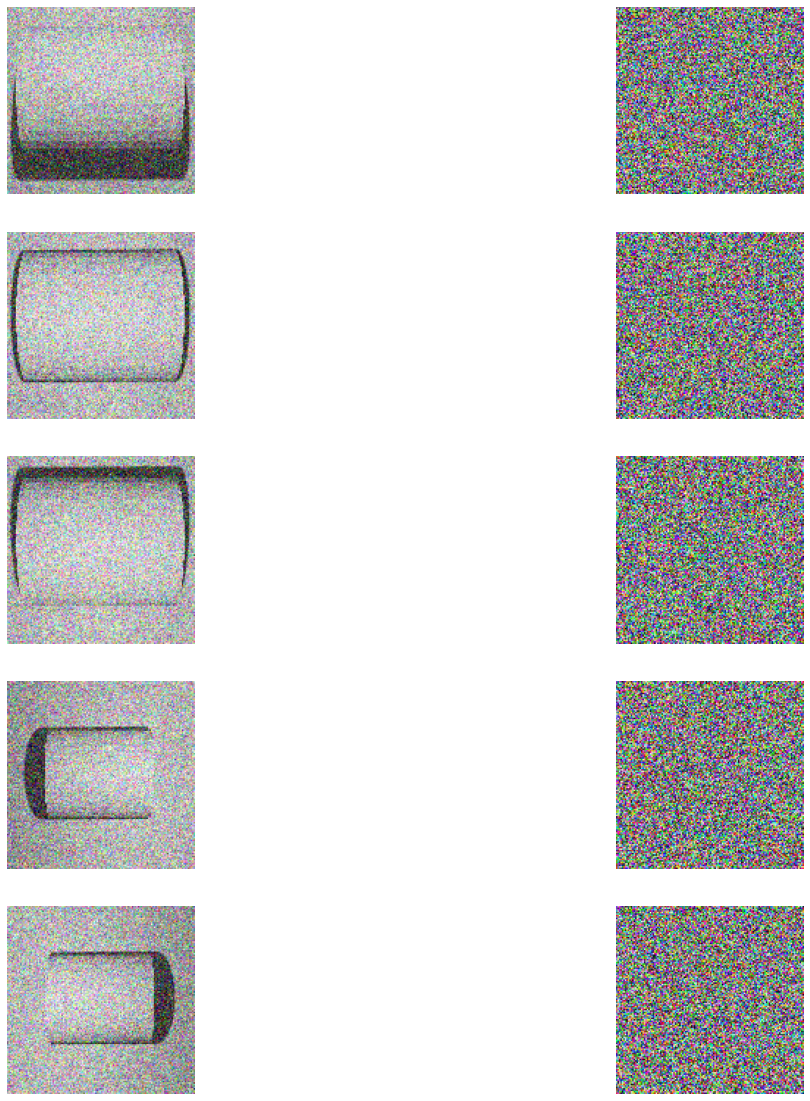

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the noisy images
noisy_images = []
for i in range(5):
    path = "/content/drive/MyDrive/Colab Notebooks/data/GNmines/" + str(i) + ".png"
    noisy_image = tf.keras.preprocessing.image.load_img(path)
    noisy_image = tf.keras.preprocessing.image.img_to_array(noisy_image)
    noisy_image = tf.image.resize(noisy_image, (128, 128))
    noisy_images.append(noisy_image) # The resulting noisy_images array will have the shape (5, 128, 128, 3), representing five 128x128 RGB images.

noisy_images = np.array(noisy_images)

# Build the DAE model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128 * 128 * 3),
    tf.keras.layers.Reshape((128, 128, 3))
])


model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the DAE
model.fit(noisy_images, noisy_images, epochs=50)

denoised_images = model.predict(noisy_images)

fig, axs = plt.subplots(5, 2, figsize=(20, 20))
for i in range(5):
    axs[i, 0].imshow(noisy_images[i].astype(np.uint8))
    axs[i, 0].axis('off')
    axs[i, 1].imshow(denoised_images[i].astype(np.uint8))
    axs[i, 1].axis('off')

plt.show()
